In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Video

%matplotlib notebook

In [2]:
# img_path = 'thai.jpg'
img_path = 'thai.jpg'

In [3]:
img_read = cv2.imread(img_path)
img_resize = cv2.resize(img_read,(img_read.shape[1]//4,img_read.shape[0]//4))
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
img_gray.shape

(191, 256)

In [4]:
deg = 30
rad = np.deg2rad(deg)
rad

0.5235987755982988

In [5]:
f_matrix = [[np.cos(rad), -np.sin(rad)],
            [np.sin(rad), np.cos(rad)]]
f_matrix

[[0.8660254037844387, -0.49999999999999994],
 [0.49999999999999994, 0.8660254037844387]]

In [6]:
b_matrix = [[np.cos(rad), np.sin(rad)],
            [-np.sin(rad), np.cos(rad)]]
b_matrix

[[0.8660254037844387, 0.49999999999999994],
 [-0.49999999999999994, 0.8660254037844387]]

In [7]:
corner = np.array([[[0],
                    [0]],
                   
                   [[0],
                    [img_gray.shape[1]]],
                   
                   [[img_gray.shape[0]],
                    [0]],
                   
                   [[img_gray.shape[0]],
                    [img_gray.shape[1]]]])

output_corner = np.matmul(f_matrix,corner)
output_corner.T[0][0]

array([   0.        , -128.        ,  165.41085212,   37.41085212])

In [8]:
output_size = np.array([np.ceil(np.max(output_corner.T[0][0]) - np.min(output_corner.T[0][0])),
                        np.ceil(np.max(output_corner.T[0][1]) - np.min(output_corner.T[0][1]))], dtype=np.int)
output_size

array([294, 318])

In [9]:
output_offset = np.round(np.min(output_corner.T[0], axis=1)).astype(np.int)
output_offset

array([-128,    0])

In [10]:
output_bi = np.zeros(output_size)
output_bi.shape

(294, 318)

In [11]:
for x in range(0, output_size[0]):
    for y in range(0, output_size[1]):
        current_xy = np.array(([x +output_offset[0]], [y +output_offset[1]]))
        original_xy = np.matmul(b_matrix, current_xy)
        
        x0 = np.floor(original_xy[0]).astype(np.int)[0]
        y0 = np.floor(original_xy[1]).astype(np.int)[0]
        x1 = x0 +1
        y1 = y0 +1
        dx = original_xy[0] - x0
        dy = original_xy[1] - y0
        
        if original_xy[0] < 0 or original_xy[1] < 0 or original_xy[0] >= np.floor(img_gray.shape[0])-1 or original_xy[1] >= np.floor(img_gray.shape[1])-1:
            output_bi[x][y] = 255
        else:
            output_bi[x][y] = img_gray[x0][y0] + (img_gray[x1][y0] - img_gray[x0][y0])*dx  + (img_gray[x0][y1] - img_gray[x0][y0])*dy + (img_gray[x1][y1]+img_gray[x0][y0]-(img_gray[x0][y1]+img_gray[x1][y0])*dx*dy)

/home/j/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


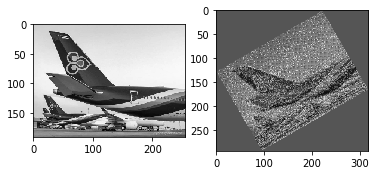

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(img_gray, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(output_bi, 'gray')

## Create Class

In [13]:
class Rotate():

    def imgRead(self, img_path):
        img_read = cv2.imread(img_path)
        img_resize = cv2.resize(img_read,(img_read.shape[1]//4,img_read.shape[0]//4))
        img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)

        self.img_gray = img_gray
        
    def mappingMatrix(self, deg):
        rad = np.deg2rad(deg)
        self.f_matrix = [[np.cos(rad), -np.sin(rad)],
                         [np.sin(rad), np.cos(rad)]]
        self.b_matrix = [[np.cos(rad), np.sin(rad)],
                         [-np.sin(rad), np.cos(rad)]]
        
    def cornerCoordinate(self):
        corner = np.array([[[0],
                            [0]],

                           [[0],
                            [self.img_gray.shape[1]]],

                           [[self.img_gray.shape[0]],
                            [0]],

                           [[self.img_gray.shape[0]],
                            [self.img_gray.shape[1]]]])

        output_corner = np.matmul(self.f_matrix,corner)
                
        output_size = np.array([np.ceil(np.max(output_corner.T[0][0]) - np.min(output_corner.T[0][0])),
                                np.ceil(np.max(output_corner.T[0][1]) - np.min(output_corner.T[0][1]))], dtype=np.int)
        
        self.output_size = output_size
        
        output_offset = np.round(np.min(output_corner.T[0], axis=1)).astype(np.int)
        self.output_offset = output_offset
        
    def backwardMapping(self):
        output_bi = np.zeros(self.output_size)

        for x in range(0, self.output_size[0]):
            for y in range(0, self.output_size[1]):
                current_xy = np.array(([x +self.output_offset[0]], [y +self.output_offset[1]]))
                original_xy = np.matmul(self.b_matrix, current_xy)

                x0 = np.floor(original_xy[0]).astype(np.int)[0]
                y0 = np.floor(original_xy[1]).astype(np.int)[0]
                x1 = x0 +1
                y1 = y0 +1
                dx = original_xy[0] - x0
                dy = original_xy[1] - y0

                if original_xy[0] < 0 or original_xy[1] < 0 or original_xy[0] >= np.floor(self.img_gray.shape[0])-1 or original_xy[1] >= np.floor(self.img_gray.shape[1])-1:
                    output_bi[x][y] = 255
                else:
                    output_bi[x][y] = self.img_gray[x0][y0] + (self.img_gray[x1][y0] - self.img_gray[x0][y0])*dx  + (self.img_gray[x0][y1] - self.img_gray[x0][y0])*dy + (self.img_gray[x1][y1]+self.img_gray[x0][y0]-(self.img_gray[x0][y1]+self.img_gray[x1][y0])*dx*dy)
                    
        return output_bi

/home/j/.local/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in ubyte_scalars


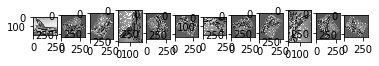

In [14]:
r = Rotate()
r.imgRead(img_path)

deg_list = np.arange(0,360,30)

size = len(deg_list)
output_bi_list = []

for i in range(size):
    r.mappingMatrix(deg_list[i])
    r.cornerCoordinate()
    g = r.backwardMapping()
    
    plt.subplot(1, size, i+1)
    plt.imshow(g, 'gray')
    
    output_bi_list.append(g)

## Write Video

In [15]:
filename = 'lab3-1.avi'
size = max(r.output_size)

output = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc('M','J','P','G'), 1, (size, size))

for img in output_bi_list:
    img_2d = (img/np.max(img)*100).astype(np.uint8)
    img_2d_resize = cv2.resize(img_2d, (size, size))
    img_3d = np.stack((img_2d_resize, img_2d_resize, img_2d_resize), axis=2)

    output.write(img_3d)

output.release()
print("Video file creation successful!")

Video file creation successful!


In [16]:
Video(filename)